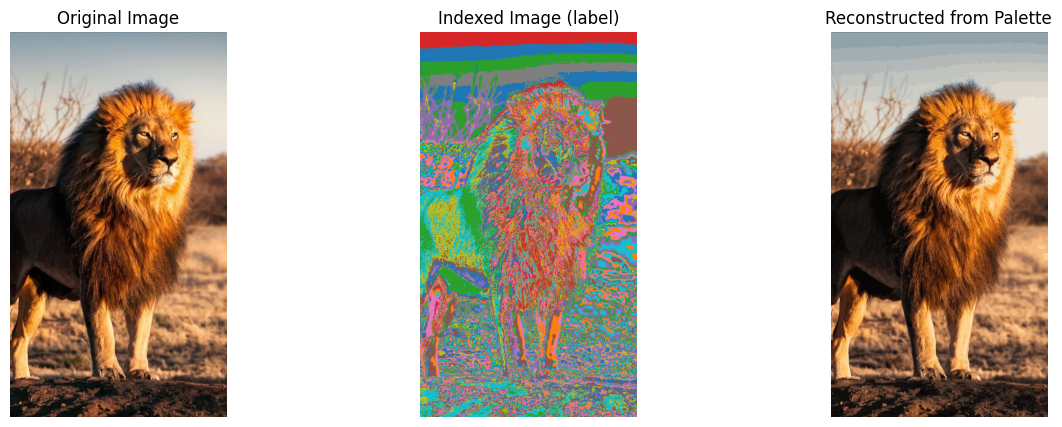

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import urllib.request
import io

# URL gambar
url = "https://drive.google.com/uc?id=1gDNmLs_GZF6AHOFU2k5gGHkDPR0jUBqT"

# Buka gambar dari URL
with urllib.request.urlopen(url) as response:
    image_file = io.BytesIO(response.read())

# Load gambar
image = Image.open(image_file).convert("RGB")
image_np = np.array(image)

# Ukuran gambar
h, w, c = image_np.shape

# Definisikan palette warna: [Hitam, Merah, Biru, Hijau]
palette = np.array([
    [0, 0, 0],       # Hitam
    [255, 0, 0],     # Merah
    [0, 0, 255],     # Biru
    [0, 255, 0]      # Hijau
])

# Membuat array kosong untuk citra terindeks
indexed_image = np.zeros((h, w), dtype=np.uint8)

# Looping semua pixel
for i in range(h):
    for j in range(w):
        pixel = image_np[i, j]

        # Hitung jarak Euclidean ke semua warna dalam palette
        distances = np.linalg.norm(palette - pixel, axis=1)

        # Cari index warna terdekat
        nearest_color_index = np.argmin(distances)

        # Simpan indexnya
        indexed_image[i, j] = nearest_color_index


# Tampilkan hasilnya
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Original RGB Image")
plt.imshow(image_np)
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Indexed Image (Label Map)")
plt.imshow(indexed_image, cmap='tab10')  # Cmap tab10 biar beda warna indexnya
plt.axis('off')

plt.show()